In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ir_df = pd.read_csv('insurance_claims.csv')

In [4]:
class insurance:
    """
       Initialize class with dataframe
    """
    def __init__(self,ir_df):
        self.ir_df = ir_df
    """ 
        Displays dataset 
    """
    def Dataframe(self):
        return self.ir_df
        
    """ 
       Information of the dataset
    """
    def Basic_info(self):
        return self.ir_df.info()

    """ 
       rows and columns count
    """
    def Count_of_rows_columns(self):
        return self.ir_df.shape

    """ 
       Indexing 
    """
    def indexing(self):
        return self.ir_df.index
    """ 
       Checking null values
    """
    def null_value_sum(self):
        return self.ir_df.isnull().sum()
    """
       checking for duplicates
    """
    def checking_duplicates(self):
        return self.ir_df.duplicated().sum()
        
    """
       Which incident_type has the highest average total_claim_amount?
    """
    def highest_average_total_claim_amount (self):
        return self.ir_df.groupby('incident_type')['total_claim_amount'].mean()
    """
       no.of fraud_reported
    """
    def fraud_reported(self):
        return self.ir_df['fraud_reported'].value_counts()
    """
       Which incident_state has the highest number of claims
    """
    def higest_claims(self):
        return self.ir_df['incident_state'].value_counts()
    """
       average claim amount by policy state
    """
    def average_amount_policy_state(self):
        return self.ir_df.groupby('policy_state')['total_claim_amount'].mean()

    """
       outliners
    """
    def Outliers(self, col):
        Q1 = self.ir_df[col].quantile(0.25)
        Q3 = self.ir_df[col].quantile(0.75)
        IQR = Q3 - Q1 # inter quartile range
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = self.ir_df[(self.ir_df[col] < lower_bound) | (self.ir_df[col] > upper_bound)]
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        return

        
    """ 
        Plot a pie chart 
    """
    def plot_pie_chart(self, col):
        counts = self.ir_df[col].value_counts()
        plt.figure(figsize=(7,7))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f'Distribution of {col}')
        plt.axis('equal')
        plt.show()
    """ 
        Plot a bar chart 
    """
    def plot_bar_chart(self, col):
        number_clames = ir_df['incident_state'].value_counts()
        plt.bar(number_clames.index,number_clames.values,color=['skyblue', 'lightgreen','Goldenrod'])
        plt.title(f'Distribution of {col}')
        plt.show()
    """ 
        scatter plot
    """
    def Scatter_plot(self,col1,col2):
        plt.figure(figsize=(12,8))
        sns.scatterplot(data=self.ir_df, x= col1, y= col2, hue= col2 , palette="viridis")
        plt.title(f"Scatter Plot of {col2} vs {col1}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.xticks()
        plt.show()
    """
       box plot
    """
    def box_plot(self,col1,col2):
        sns.boxplot(data = ir_df,x = col1,y = col2)
        plt.show()
    """
       kdeplot
    """
    def kdeplot(self,col1):
        sns.kdeplot(self.ir_df[col1],shade=True,  color='orange')
        plt.show()
    """
       heat map
    """
    def heat_map(self):
        numeric_df = self.ir_df.select_dtypes(include=np.number)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.show()
           

In [5]:
insurance = insurance(ir_df)

In [6]:
insurance.Dataframe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [7]:
insurance.Basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [30]:
insurance.Count_of_rows_columns()

(1000, 39)

In [31]:
insurance.indexing()

RangeIndex(start=0, stop=1000, step=1)

In [32]:
insurance.null_value_sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [33]:
insurance.checking_duplicates()

np.int64(0)

In [34]:
insurance.highest_average_total_claim_amount()

incident_type
Multi-vehicle Collision     61637.016706
Parked Car                   5308.214286
Single Vehicle Collision    64445.459057
Vehicle Theft                5517.234043
Name: total_claim_amount, dtype: float64

In [17]:
insurance.fraud_reported()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [20]:
insurance.higest_claims()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

In [23]:
insurance.average_amount_policy_state()

policy_state
IL    52844.171598
IN    53006.967742
OH    52467.187500
Name: total_claim_amount, dtype: float64

In [8]:
insurance.Outliers('total_claim_amount')	

Lower Bound: -1357.5
Upper Bound: 113762.5
Number of outliers: 1


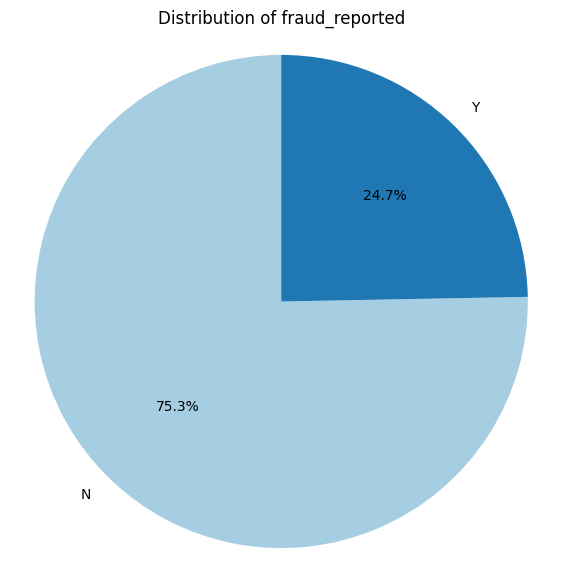

In [62]:
insurance.plot_pie_chart("fraud_reported")

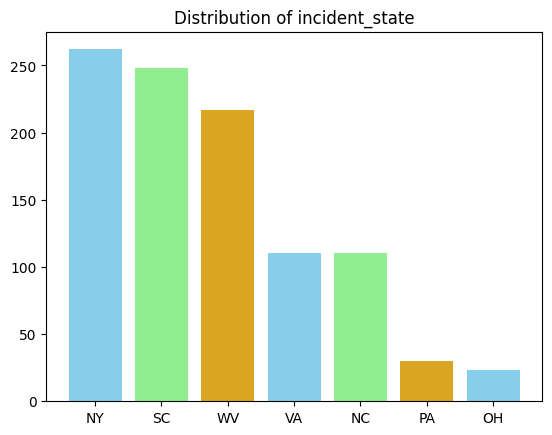

In [78]:
insurance.plot_bar_chart('incident_state')

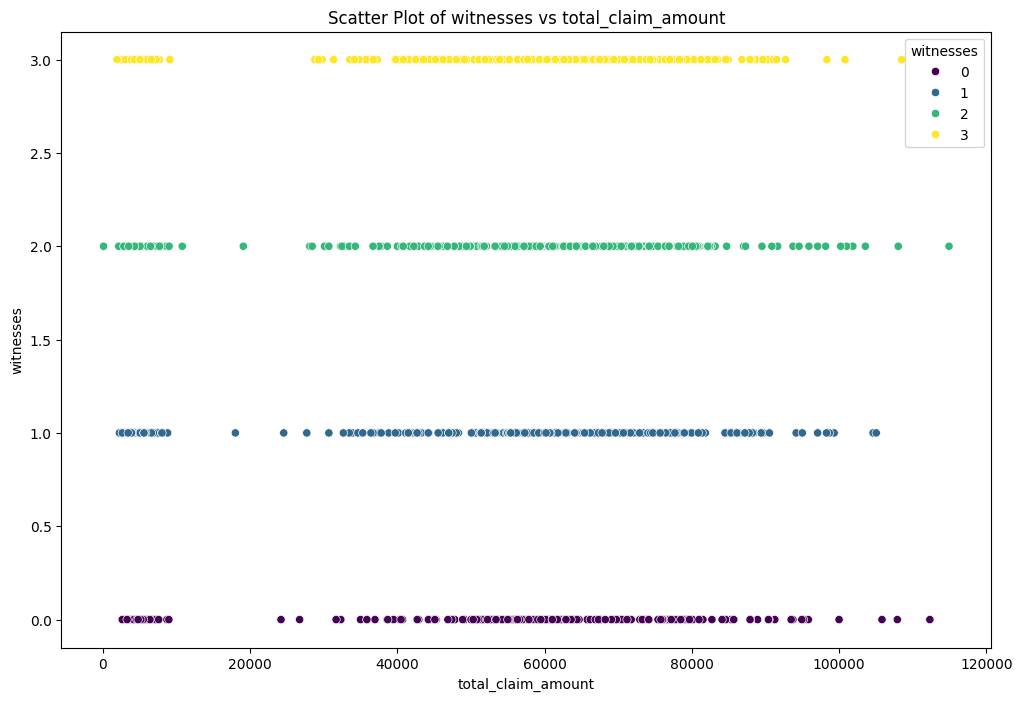

In [84]:
insurance.Scatter_plot("total_claim_amount","witnesses")

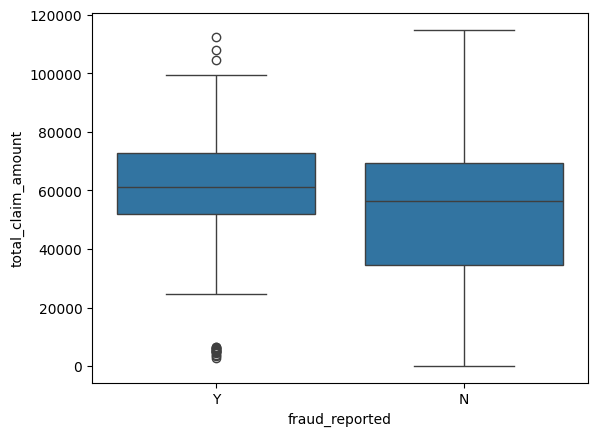

In [89]:
insurance.box_plot("fraud_reported","total_claim_amount")

/var/folders/rt/fm3xxqs57bg3zrhms2_xp_zr0000gn/T/ipykernel_1779/308833883.py:100: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.ir_df[col1],shade=True,  color='orange')


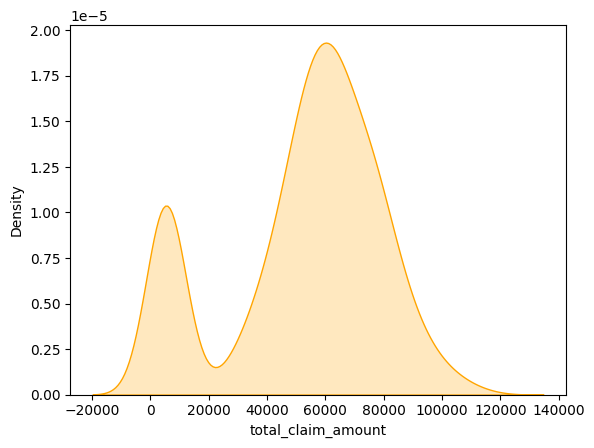

In [93]:
insurance.kdeplot("total_claim_amount")

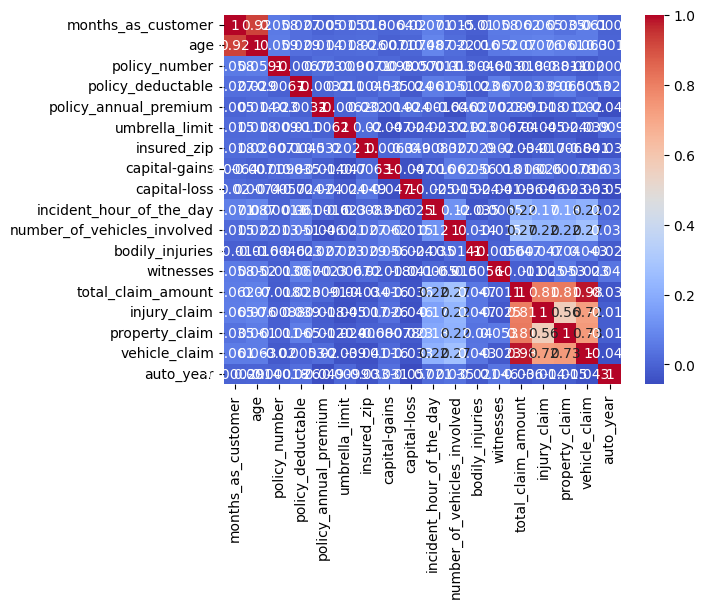

In [97]:
insurance.heat_map()

In [5]:
import re
import psycopg2

# --- 1. Sanitize table name (important!) ---
table_name = 'insurance_claims'
clean_table_name = re.sub(r'\W+', '_', table_name)  # Replace special chars with underscores

# --- 2. Infer SQL types from pandas dtypes ---
def infer_sql_types(dtype):
    import pandas as pd
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

columns = ir_df.dtypes
sql_columns = ',\n '.join([f'"{col}" {infer_sql_types(dtype)}' for col, dtype in columns.items()])

# --- 3. Generate CREATE TABLE statement ---
create_stmt = f"""
CREATE TABLE IF NOT EXISTS {clean_table_name} (
 {sql_columns}
);
"""

# --- 4. Connect to PostgreSQL ---
conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="@Venkat2252",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# --- 5. Create table ---
cur.execute(create_stmt)
conn.commit()

# --- 6. Prepare INSERT statement ---
columns_list = list(ir_df.columns)
placeholders = ', '.join(['%s'] * len(columns_list))
insert_stmt = f"""
INSERT INTO {clean_table_name} ({', '.join(['"{}"'.format(col) for col in columns_list])})
VALUES ({placeholders});
"""

# --- 7. Insert data efficiently (bulk insert) ---
data = [tuple(row) for row in ir_df.to_numpy()]
cur.executemany(insert_stmt, data)
conn.commit()

cur.close()
conn.close()

print(f"✅ Data inserted successfully into table: {clean_table_name}")

✅ Data inserted successfully into table: insurance_claims
